# Giới thiệu

Đây là một bài kiểm tra giữa kỳ mẫu của môn Phân tích đánh giá hiệu năng hệ thống của thầy Hải Châu.

Đây chỉ là file mà mình dùng để làm bài, có thể sẽ có một vài câu mà mình làm sai :v

## Câu 1
Một nhóm phát triển thay đổi giao diện web từ A sang B và lấy ý kiến người sử dụng.
Mỗi người sử dụng được lựa chọn một lần A hoặc B.
Tính số người cần lấy ý kiến để sai số của kiểm định tỷ lệ p=0.5 nhỏ hơn +/-1% với xác xuất 95%

In [92]:
# Khai báo các biến
conf <- 0.95
alpha <- 1 - 0.95 # (1-conf)
p <- 0.4 # tỷ lệ
e <- 0.01 # sai số
z <- qnorm(1 - alpha / 2) # z bằng -qnorm(alpha/2)

# Tính kích thước mẫu
n <- (p * (1 - p) * z^2) / e^2

n

# Làm tròn lên để có số nguyên
n <- ceiling(n)

# In kết quả
print(paste("Số người cần lấy ý kiến là:", n))


[1] 9219.501

[1] "Số người cần lấy ý kiến là: 9220"


## Câu 2

Bộ dữ liệu `InsectSprays` cho ta biết hiệu quả của 6 loại thuốc trừ sâu từ A → F bằng số côn trùng bị chết khi sử dụng thuốc trên một đơn vị diện tích nông nghiệp:

Hãy so sánh hiệu quả của 6 loại thuốc trên và chọn các phương án đúng:

- [ ] Thuốc D hiệu quả hơn thuốc C
- [x] Thuốc F hiệu quả hơn thuốc C
- [x] Thuốc F hiệu quả hơn thuốc E
- [ ] Thuốc D hiệu quả hơn thuốc E

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = count ~ spray, data = InsectSprays)

$spray
           diff        lwr       upr     p adj
B-A   0.8333333  -3.866075  5.532742 0.9951810
C-A -12.4166667 -17.116075 -7.717258 0.0000000
D-A  -9.5833333 -14.282742 -4.883925 0.0000014
E-A -11.0000000 -15.699409 -6.300591 0.0000000
F-A   2.1666667  -2.532742  6.866075 0.7542147
C-B -13.2500000 -17.949409 -8.550591 0.0000000
D-B -10.4166667 -15.116075 -5.717258 0.0000002
E-B -11.8333333 -16.532742 -7.133925 0.0000000
F-B   1.3333333  -3.366075  6.032742 0.9603075
D-C   2.8333333  -1.866075  7.532742 0.4920707
E-C   1.4166667  -3.282742  6.116075 0.9488669
F-C  14.5833333   9.883925 19.282742 0.0000000
E-D  -1.4166667  -6.116075  3.282742 0.9488669
F-D  11.7500000   7.050591 16.449409 0.0000000
F-E  13.1666667   8.467258 17.866075 0.0000000


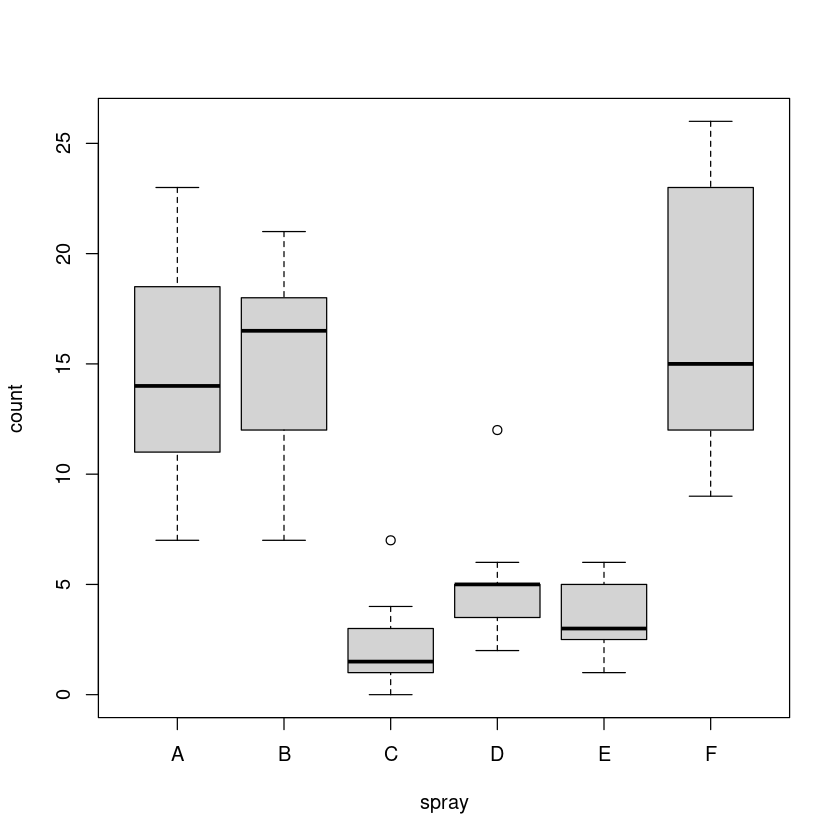

In [40]:
# Load the dataset if necessary
data(InsectSprays)
# Visualize distribution of insect counts for each spray type
boxplot(count ~ spray, data = InsectSprays)
# Perform ANOVA
anova_result <- aov(count ~ spray, data = InsectSprays)
# Perform Tukey HSD
TukeyHSD(anova_result)


### Đáp án
Từ kết quả quả của hàm `aov` phục vụ cho __ANOVA__ (**Analysis of Variance**) và hàm `Post-hoc test` `TukeyHSD`.
> **Post-hoc Tests:** If ANOVA indicates significant differences, often Tukey's HSD test is used to make pairwise comparisons and determine which specific sprays differ from each other

Ta có thể thấy được giá trị của __F__ hơn hẳn so với __C__, __D__, và __E__ trên ảnh và qua bảng thống kê thì các giá trị so sánh của F với các loại thuốc này cũng dương (chứng tỏ bên trái lớn hơn) và `p-value` của các so sánh này cũng nằm dưới 0.05 là đủ để tin tưởng giả thuyết.

Còn đối với lý do tại sao **D** không hiệu quả hơn **E** hay **C** so trên hình thì khoảng giá trị của 2 loại thuốc này vẫn còn đan xen vào nhau và trên bảng thống kê thì giá trị của các `p-value` lớn hơn 0.05 nên ta không thể tin tưởng vào giả thuyết được đưa ra

## Câu 3

Cho bộ dữ liệu `mtcars` có sẵn trong R. Biến `vs` cho biết động cơ của ô tô được sắp xếp theo hình chữ V (`vs=0`) hay xếp thẳng (`vs=1`). Hãy so sánh tỷ lệ ô tô có động cơ sắp xếp theo hình chữ V trên tổng số ô tô (p) với 50% và chọn 2 phương án đúng:

- [ ] Sự khác biệt giữa p và 50% không có ý nghĩa thống kê do `p-value < 0.5`
- [ ] `H0: p!=50%`
- [x] `H0: p=50%`
- [x] Sự khác biệt giữa p và 50% không có ý nghĩa thống kê do `p-value > 0.5`

In [62]:
library(car)
data(mtcars)
mtcars <- mtcars[order(mtcars$vs), ]
x <- sum(mtcars$vs == 0)
x
n <- nrow(mtcars)
n
prop.test(x, n, p = 0.5, alternative = "two.sided")


[1] 18

[1] 32


	1-sample proportions test with continuity correction

data:  x out of n, null probability 0.5
X-squared = 0.28125, df = 1, p-value = 0.5959
alternative hypothesis: true p is not equal to 0.5
95 percent confidence interval:
 0.3788033 0.7316489
sample estimates:
     p 
0.5625 


### Đáp án

Ở đây ta thấy có 18 xe có động cơ chữ V, sử dụng hàm `prop.test` ta kiểm tra tỷ lệ (probability) của số xe có động cơ chữ V so với tổng số xe (32)

→ Ta có thể thấy từ kết quả là `p-value=0.5959` và `H0: p=50%`


## Câu 4

Một kiểm định t (t.test) có kết quả trong R như sau:

> One sample t-test
> data: x
> t = -51.822, df = 99, p-value < 2.2e-16
> alternative hypothesis: true mean is not equal to 0
> 95 percent confidence interval:
> -0.5177778 -0.4795893
> sample estimates:
> mean of x
> -0.4986836

Hãy chọn 2 mệnh đề đúng:

- [x] H0: giá trị trung bình bằng 0
- [x] Bác bỏ giả thuyết khác 0
- [ ] H0: giá trị trung bình khác 0
- [ ] Không thể bác bỏ giả thuyết khác 0

### Đáp án
Nhìn vào ta thấy giả thuyết khác 0 là ngược lại của `alternative hypothesis` nên ta chọn câu đầu và giá trị `p-value < 2.2e-16` tức là bé hơn 0.05 nên là ta không thể bác bỏ giả thuyết khác 0

## Câu 5

TitanicSurvival là bộ dữ liệu trong thư viện car, cho biết danh sách hành khách chết và sống sót trong thảm họa tàu Titanic được phân chia theo giới tính, tuổi và hạng vé. Hãy chọn phương án đúng:

- [x] Tỷ lệ sống sót của hành khách có vé hạng 1st cao hơn hành khách có vé hạng 3rd
- [ ] Tỷ lệ hành khách sống sót ở cả 3 hạng vẽ khác nhau không có sự khác biệt
- [ ] Tỷ lệ sống sót của hành khách có vé hạng 1st thấp hơn hành khách có vé hạng 3rd


,survived,sex,age,passengerClass
,<fct>,<fct>,<dbl>,<fct>
"Allen, Miss. Elisabeth Walton",yes,female,29.0000,1st
"Allison, Master. Hudson Trevor",yes,male,0.9167,1st
"Allison, Miss. Helen Loraine",no,female,2.0000,1st
"Allison, Mr. Hudson Joshua Crei",no,male,30.0000,1st
"Allison, Mrs. Hudson J C (Bessi",no,female,25.0000,1st
"Anderson, Mr. Harry",yes,male,48.0000,1st


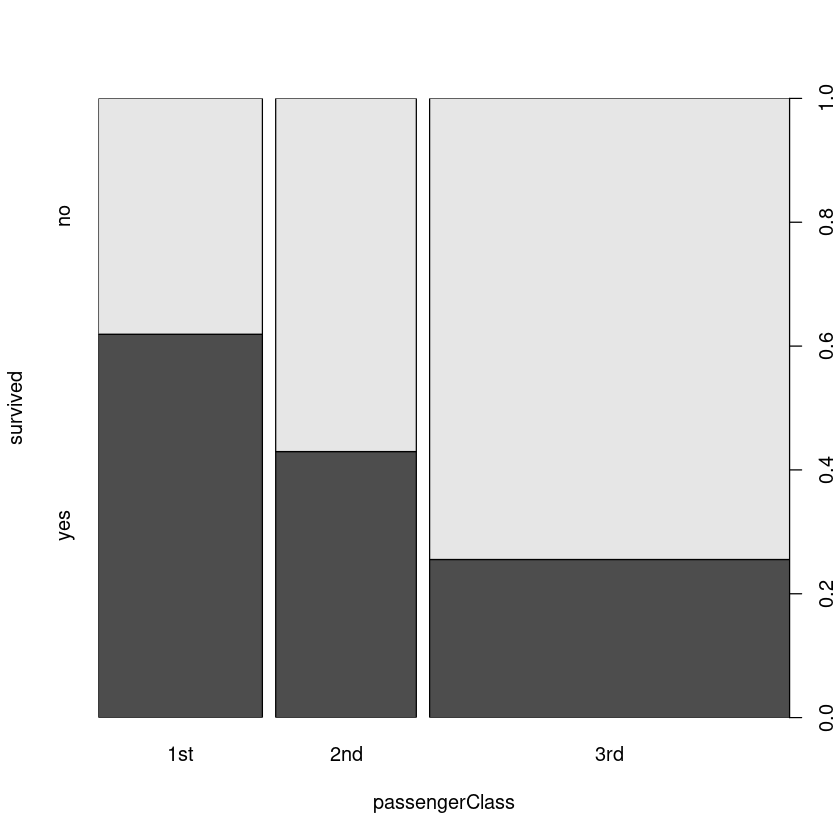

In [75]:
library(car)
data(TitanicSurvival)
head(TitanicSurvival)
plot(survived ~ passengerClass, data = TitanicSurvival)


### Đáp án

Nhìn vào đồ thị biểu diễn mối tương quan giữa hạng vẽ và tỉ lệ sống sót ta thấy được rằng tỉ lệ sống sót của vé hạng nhất cao hơn so với vé hạng ba


## Câu 6

Khi cỡ mẫu để ước lượng tỷ lệ tăng lên, độ lớn của khoảng tin cậy 95% sẽ

- [x] Giảm đi
- [ ] Tăng lên
- [ ] Không thay đổi
### Đáp án

Giảm đi do càng có nhiều dữ liệu thì ước lượng sẽ càng chính xác khoảng giá trị để ra `true mean`

Môt cách khác để giải thích là khi cỡ mẫu tăng lên thì độ lệch chuẩn sẽ giảm đi, từ đó giảm khoảng tin cậy



## Câu 7

Giống câu 3 nhưng thay bằng xe số tự động hay không thông qua biến `am` của bộ dữ liệu `mtcars` và 75% thay vì 50%

- [ ] Sự khác biệt giữa p và 75% không có ý nghĩa thống kê do `p-value < 0.5`
- [ ] `H0: p!=75%`
- [x] `H0: p=75%`
- [x] Sự khác biệt giữa p và 75% không có ý nghĩa thống kê do `p-value > 0.5`


In [85]:
library(car)
data(mtcars)
head(mtcars)
x <- sum(mtcars$am == 0)
x
n <- nrow(mtcars)
n
prop.test(x = x, n = n, p = 0.75)


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


[1] 19

[1] 32


	1-sample proportions test with continuity correction

data:  x out of n, null probability 0.75
X-squared = 3.375, df = 1, p-value = 0.06619
alternative hypothesis: true p is not equal to 0.75
95 percent confidence interval:
 0.4078543 0.7578086
sample estimates:
      p 
0.59375 


In [1]:
# library(MASS)
# data(survey)
# library(dplyr) # For data manipulation
# library(ggplot2) # For plotting
# head(survey)
library()


Warning message in library():
“library ‘/usr/lib/R/site-library’ contains no packages”


R packages available

Packages in library ‘/usr/local/lib/R/site-library’:

abind                   Combine Multidimensional Arrays
anytime                 Anything to 'POSIXct' or 'Date' Converter
askpass                 Password Entry Utilities for R, Git, and SSH
assertthat              Easy Pre and Post Assertions
backports               Reimplementations of Functions Introduced Since
                        R-3.0.0
base64enc               Tools for base64 encoding
BH                      Boost C++ Header Files
bigD                    Flexibly Format Dates and Times to a Given
                        Locale
bit                     Classes and Methods for Fast Memory-Efficient
                        Boolean Selections
bit64                   A S3 Class for Vectors of 64bit Integers
bitops                  Bitwise Operations
blob                    A Simple S3 Class for Representing Vectors of
                        Binary Data ('BLOBS')
boot                    Bootstrap Functions 